Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4969 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3739 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3362 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3122 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2818 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2585 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2478 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

1/1 [==============================] - 0s 65ms/step


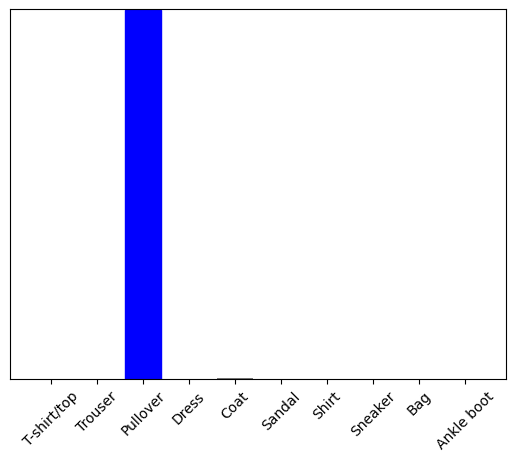

In [43]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터셋 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 레이블에 매핑된 클래스 이름
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색
# train_images.shape
# len(train_labels)
# train_labels
# test_images.shape
# len(test_labels)

# 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

# 훈련 셋의 첫 25개 이미지, 클래스 이름 출력
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

# 모델 구성
## 층 설정
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),          # 2차원 배열의 이미지 포맷을 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation='relu'),          # 128개의 노드(or 뉴런)
    tf.keras.layers.Dense(10)                               # 10개 노드의 소프트맥스 층, 10개의 확률 반환(전체 합은 1),
])                                                          # 각 노드는 10개 클래스 중 하나에 속할 확률을 나타냄

## 모델 컴파일
model.compile(optimizer='adam',                                                         # 옵티마이저
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # 손실 함수
              metrics=['accuracy'])                                                     # 메트릭

# 모델 훈련
## 모델 피드
model.fit(train_images, train_labels, epochs=10)

## 정확도 평가
# test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
# print("Test accuracy: ", test_acc)

# 예측하기
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# predictions = probability_model.predict(test_images)          # 전체 테스트 이미지 예측
# np.argmax(predictions[0])

## 예측 확인
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# rows = 5
# cols = 3
# cells = rows * cols
# plt.figure(figsize=(2 * 2 * cols, 2 * rows))
# for i in range(cells):
#   plt.subplot(rows, 2 * cols, 2 * i + 1)
#   plot_image(i, predictions[i], test_labels, test_images)
#   plt.subplot(rows, 2 * cols, 2 * i + 2)
#   plot_value_array(i, predictions[i], test_labels)
# plt.tight_layout()
# plt.show()

# 훈련된 모델 사용
# Grab an image from the test dataset.
img  = test_images[1]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

predictions_single = probability_model.predict(img)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()